In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Загружаем первый датасет (базальтопластик) и посмотрим на названия столбцов
df_bp = pd.read_excel(r"C:\Users\leon-\BKP\data\X_bp.xlsx")
df_bp.shape

In [ ]:
df_bp # выведем датасет для наглядности в виде таблицы

In [ ]:
#Удаляем первый неинформативный столбец
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
#Посмотрим на первые 5 строк первого датасета и убедимся, что первый столбец удалился
df_bp.head()

In [ ]:
# Проверим размерность первого файла
df_bp.shape

In [ ]:
# Загружаем второй датасет 
df_nup = pd.read_excel(r"C:\Users\leon-\BKP\data\X_nup.xlsx")
df_nup.shape

In [ ]:
df_nup # выведем датасет для наглядности в виде таблицы

In [ ]:
# Удаляем первый неинформативный столбец
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
# Посмотрим на первые 5 строк второго датасета и убедимся,
# что и здесь не нужный первый столбец успешно удалился
df_nup.head()

In [ ]:
# Проверим размерность второго файла
df_nup.shape

In [ ]:
# По условию задачи нужно объединить датсеты по типу 'inner'. 
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head().T

In [ ]:
#Посмотрим количество колонок и столбцов
df.shape

In [ ]:
# дубликаты значений отсутствуют
df.duplicated().sum()

In [ ]:
df.columns

In [ ]:
# дубликаты значений обнаружены в столбцах: Шаг нашивки и Плотность нашивки, но это не критично
du = df.duplicated(['Шаг нашивки', 'Плотность нашивки']).sum()

print(du)

In [ ]:
# Посмотрим на начальные и конечные строки нашего датасета на данном этапе работы
df

In [ ]:
df.info() 
# нет пустых значений, количество «Not null» совпадает с количеством строк в датасете, а именно 1023.

In [ ]:
df.nunique() # Далее проверим уникальность значений в датасете командой df.nunique()

In [ ]:
df['Угол нашивки, град'].count
# Выведем значения с помошью df['Угол нашивки, град'].count
# И увидим эти 2 значения "0" и "90".

In [ ]:
# Проверим кол-во элементов в столбцах

In [ ]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

In [ ]:
df['Угол нашивки, град'][df['Угол нашивки, град'] == 90.0].count()

In [ ]:
# Приведем столбец "Угол нашивки" к значениям 0 и 1
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
# Приведем столбец "Угол нашивки" к типу int
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [ ]:
# Переименуем столбец в 'Угол нашивки_мод'
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки_мод'})
df

In [ ]:
# Перепроверим количество значений в столбце равный "0", значения совпадают. 
df['Угол нашивки_мод'][df['Угол нашивки_мод'] == 0.0].count()

In [ ]:
# Переведем столбец с нумерацией в int
df.index = df.index.astype('int')

In [ ]:
# Сохраним датасет в папку data с название inner.xlsx.
df.to_excel("data\inner.xlsx")

In [ ]:
# Команда "describe" выводит статистику наших данных:
# общее количество, среднее значение, стандартное отклонение,
# минимальное, квартили, медиана, максимальное.
df.describe()
a =df.describe().round(2)
a.T

In [ ]:
df.isnull().sum()
# Пропущенных данных нет.

In [ ]:
# Проверим датасет на дубликаты
df.duplicated().sum()
#Дубликатов нет

In [ ]:
# Корреляция по методу Кендалла.
df.corr(method = 'kendall').round(2)


In [ ]:
# Корреляция по методу Пирсона.
df.corr(method ='pearson').round(2)

In [ ]:
# Тепловая карта коэффициентов корреляции. Вариант 1
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), linewidths= .2, square=True, cmap='coolwarm' )

In [ ]:
# Тепловая карта коэффициентов корреляции. Вариант 2
# переменная для построения тепловой карты.
Heat_Map = np.tril(df.corr()) # np.tril возвращает верхний треугольник любой заданной ему матрицы
# указываем размеры для отображения
f, ax = plt.subplots(figsize = (12, 9))
# передаем параметры в heatmap и создаем цветовую палитру
sns.heatmap(df.corr(), mask = Heat_Map, annot = True, square = True, cmap = 'coolwarm', linewidths=1, linecolor='white')
plt.xticks(rotation = -45, ha='left') # поворачиваем надпись на 45 градусов влево.
plt.show()

In [ ]:
# Построим гистограммы распределения каждой из переменных.
df.hist(figsize = (20,20) )

plt.show()

In [ ]:
# Проверка, есть ли выбросы на Диаграммах "ящики с усами"
fig, axs = plt.subplots(13, figsize = (12,15))
plt1 = sns.boxplot(df['Соотношение матрица-наполнитель'], ax = axs[0])
plt2 = sns.boxplot(df['Плотность, кг/м3'], ax = axs[1])
plt3 = sns.boxplot(df['модуль упругости, ГПа'], ax = axs[2])
plt4 = sns.boxplot(df['Количество отвердителя, м.%'], ax = axs[3])
plt5 = sns.boxplot(df['Содержание эпоксидных групп,%_2'], ax = axs[4])
plt6 = sns.boxplot(df['Температура вспышки, С_2'], ax = axs[5])
plt7 = sns.boxplot(df['Поверхностная плотность, г/м2'], ax = axs[6])
plt8 = sns.boxplot(df['Модуль упругости при растяжении, ГПа'], ax = axs[7])
plt9 = sns.boxplot(df['Прочность при растяжении, МПа'], ax = axs[8])
plt10 = sns.boxplot(df['Потребление смолы, г/м2'], ax = axs[9])
plt11 = sns.boxplot(df['Угол нашивки_мод'], ax = axs[10])
plt12 = sns.boxplot(df['Шаг нашивки'], ax = axs[11])
plt13 = sns.boxplot(df['Плотность нашивки'], ax = axs[12])
plt.tight_layout()

In [ ]:
# Попарные графики рассеяния точек
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
# Построение 3D диаграммы с наиболее коррелируемыми коэффициентами
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = df['Количество отвердителя, м.%']
y = df['Плотность нашивки']
z = df['Угол нашивки_мод']

ax.scatter(x, y, z)
ax.set_xlabel("Количество отвердителя, м.%")
ax.set_ylabel("Плотность нашивки")
ax.set_zlabel("Угол нашивки_мод")

plt.show()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
x = df['Соотношение матрица-наполнитель']
y = df['Потребление смолы, г/м2']
z = df['Угол нашивки_мод']
ax1.scatter(x, y, z)
ax1.set_xlabel("Соотношение матрица-наполнитель")
ax1.set_ylabel("Потребление смолы, г/м2")
ax1.set_zlabel("Угол нашивки_мод")
plt.show()

In [ ]:
# Очистка от выбросов

In [ ]:
for columns in df.columns: # создадим переменную для всех столбцов
    q75,q25 = np.percentile(df.loc[:,columns],[75,25]) # квантили 25 и 75 %
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[columns] < min,columns] = np.nan
    df.loc[df[columns] > max,columns] = np.nan

In [ ]:
df.isnull().sum() # проверка на пустые значения

In [ ]:
df = df.dropna(axis=0) # удаление пропусков

In [ ]:
df.isnull().sum() # пустые значения удалены

In [ ]:
df.info() # Датасет уменьшился

In [ ]:
# Проверка как убрались выбросы. Выбросов стало меньше.
fig, axs = plt.subplots(13, figsize = (12,15))
plt1 = sns.boxplot(df['Соотношение матрица-наполнитель'], ax = axs[0])
plt2 = sns.boxplot(df['Плотность, кг/м3'], ax = axs[1])
plt3 = sns.boxplot(df['модуль упругости, ГПа'], ax = axs[2])
plt4 = sns.boxplot(df['Количество отвердителя, м.%'], ax = axs[3])
plt5 = sns.boxplot(df['Содержание эпоксидных групп,%_2'], ax = axs[4])
plt6 = sns.boxplot(df['Температура вспышки, С_2'], ax = axs[5])
plt7 = sns.boxplot(df['Поверхностная плотность, г/м2'], ax = axs[6])
plt8 = sns.boxplot(df['Модуль упругости при растяжении, ГПа'], ax = axs[7])
plt9 = sns.boxplot(df['Прочность при растяжении, МПа'], ax = axs[8])
plt10 = sns.boxplot(df['Потребление смолы, г/м2'], ax = axs[9])
plt11 = sns.boxplot(df['Угол нашивки_мод'], ax = axs[10])
plt12 = sns.boxplot(df['Шаг нашивки'], ax = axs[11])
plt13 = sns.boxplot(df['Плотность нашивки'], ax = axs[12])
plt.tight_layout()

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Импорт метода нормализации

In [ ]:
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [ ]:
df_min_max.describe()

In [ ]:
# Сохраним датасет в папку data с название inner.xlsx.
df.to_excel("data\inner.xlsx")

In [ ]:
# Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [ ]:
# Метод К ближайших соседей

In [ ]:
# переменная x_MU - это Модуль упругости при растяжении
# переменная x_PR - это Прочность при растяжении

# убираем столбец Модуль упругости при растяжении, ГПа МПа из пронога
x_MU = df_min_max.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

# убираем столбец Прочность при растяжении, МПа из пронога
x_PR = df_min_max.drop(['Прочность при растяжении, МПа'], axis=1)

# Присваиваем значения столбцов перемнным y_MU и y_PR 
y_MU = df_min_max[['Модуль упругости при растяжении, ГПа']]
y_PR = df_min_max[['Прочность при растяжении, МПа']]

# разделяем выборку на тестовую и обучающую, размер 30%
X_train_MU, X_test_MU, y_train_MU, y_test_MU = train_test_split(x_MU, y_MU, test_size=0.3, random_state=1)
X_train_PR, X_test_PR, y_train_PR, y_test_PR = train_test_split(x_PR, y_PR, test_size=0.3, random_state=1)

In [ ]:
K = KNeighborsRegressor()
K_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto']
          }
Grid_K_MU = GridSearchCV(K, K_params, n_jobs=-1, cv=10)
Grid_K_MU.fit(X_train_MU, y_train_MU) # обучение модели методом fit и данными
Grid_K_MU.best_params_ # вывод результата

In [ ]:
K_MU = Grid_K_MU.best_estimator_
print(f'R2-score KNR для Модуля упругости при растяжении: {K_MU.score(X_test_MU, y_test_MU).round(4)}')

In [ ]:
models = pd.DataFrame()

In [ ]:
K_MU_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_MU', 
   'MAE': mean_absolute_error(y_test_MU, K_MU.predict(X_test_MU)), 
   'R2 score': K_MU.score(X_test_MU, y_test_MU).round(3)
}, index=['Модуль упругости при растяжении, ГПа'])

In [ ]:
models = pd.concat([models, K_MU_result])
models

In [ ]:
# Случайный лес

In [ ]:
# Модуль упругости при растяжении, ГПа

In [ ]:
forest = RandomForestRegressor()
forest_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
forest_MU = RandomizedSearchCV(forest, forest_params, n_jobs=-1, cv=10, verbose=1)
forest_MU.fit(X_train_MU, np.ravel(y_train_MU))
forest_MU.best_params_

In [ ]:
forest_MU = forest_MU.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {forest_MU.score(X_test_MU, y_test_MU).round(3)}')

In [ ]:
# Прочность при растяжении, МПа

In [ ]:
forest = RandomForestRegressor()
forest_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
forest_PR = RandomizedSearchCV(forest, forest_params, n_jobs=-1, cv=10, verbose=1)
forest_PR.fit(X_train_PR, np.ravel(y_train_PR))
forest_PR.best_params_

In [ ]:
forest_PR = forest_PR.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {forest_PR.score(X_test_PR, y_test_PR).round(3)}')

In [ ]:
# Построение Нейронной сети

In [1]:
# 2 скрытых слоя по 8 нейронов.

# ИМПОРТ
#import tensorflow_decision_forests as tfdf

import os
import tensorflow as tf
import math

import pandas as pd 
import numpy as np
import scipy

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# tensor flow - глубокое обучение
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory


# для визуализации
from matplotlib import pyplot

%matplotlib inline

In [2]:
# ЗАГРУЗКА ФАЙЛОВ
path = r'C:\users\leon-\BKP\data\inner.xlsx'
df = pd.read_excel(path, header=0, index_col = 0)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки_мод,Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [3]:
df.info() # общая информация о датасете и типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки_мод                      936 non-null    int64  
 11  Шаг нашивки       

In [4]:
df['Угол нашивки_мод'].value_counts()  # количество уникальных значений 

1    479
0    457
Name: Угол нашивки_мод, dtype: int64

In [5]:
##Создание выборок
# Создаем х и у
X, y = df.values[:, : -1], df.values[:, -1]

In [6]:
# LabelEncoder для у

y= LabelEncoder().fit_transform(y) # обучим у командой fit_transform

In [7]:
# Создание тестовой и обучающей выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, shuffle = True)
# X, y - передаем параметры, test_size= 0.3 - размер тестовой выборки, shuffle = true -перемешивание датасета

In [8]:
print(X_train.shape) #проверим размерность выборок должно совпадать
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(655, 12)
(281, 12)
(655,)
(281,)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1) # нормализация данных
normalizer.adapt(np.array(X))

Epoch 1/50
21/21 [==============================] - 1s 6ms/step - loss: 90.5834 - val_loss: 68.3285
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: -12.5027 - val_loss: -36.2058
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: -115.9516 - val_loss: -138.2223
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: -218.7922 - val_loss: -247.1125
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: -330.5446 - val_loss: -362.4337
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: -451.2466 - val_loss: -488.4623
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: -586.1511 - val_loss: -627.7607
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: -737.7064 - val_loss: -787.7704
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: -914.1484 - val_loss: -969.5104
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - los

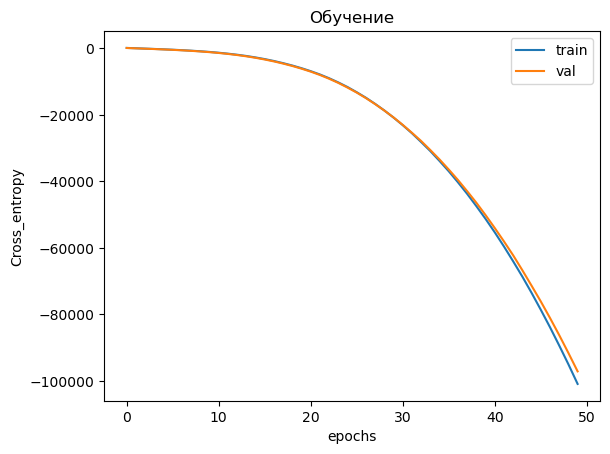

In [12]:
#Нейронная сеть
# 2 скрытых слоя по 8 нейронов.
n_features = X.shape[1] # размерность Х

model = Sequential() # модель последовательная
model.add(normalizer)
model.add(Dense(8, activation = 'relu', input_shape = (n_features,  ))) # input_shape - Входная размерность в Х
model.add(Dense(8, activation = 'relu'))


# выходной слой
model.add(Dense(1, activation = 'sigmoid'))

# Компилирование 
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
              loss=tf.keras.losses.BinaryCrossentropy())

# Обучение модели

history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))

# predict test_set
yhat = model.predict(X_test)
#model.predict(tf_serving_dataset, verbose=0)[:10]

# подсчет прогноза
score = accuracy_score(y_test, yhat)
print ('Accuracy(точность): ', score)
# визуализация процесса обучения
pyplot.title('Обучение')
pyplot.xlabel('epochs') # по оси х - эпохи
pyplot.ylabel('Cross_entropy') # по оси у - ошибка
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

In [13]:
print ('Accuracy: ', score)

Accuracy:  0.0035587188612099642


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 210
Trainable params: 185
Non-trainable params: 25
_________________________________________________________________
